In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
torch.__version__

'2.1.0+cu118'

## WorkFlow
### Muestra el flujo de trabajo end-to-end de PyTorch

## Preparando y Cargando Datos

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [175]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [176]:
len(X), len(y)

(50, 50)

### Separación training/test

In [3]:
train_split = int(0.8 * len(X))
Xtrain, Ytrain = X[:train_split], y[:train_split]
Xtest, Ytest = X[train_split:], y[train_split:]

In [39]:
def plot_prediction(train_data, train_label, test_data, test_label, predictions):
    train_data = train_data.to('cpu')
    train_label = train_label.to('cpu')
    test_data = test_data.to('cpu')
    test_label = test_label.to('cpu')
    predictions = predictions.to('cpu')
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_label, c='b', s=4, label="Training Data") #Training data en azul
    plt.scatter(test_data, test_label, c='g', s=4, label="Testing Data") #Test en verde
    if len(predictions) > 1:
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions") #Predicciones en rojo
    plt.legend(prop={'size': 14}) #Leyenda

    plt.show()

In [179]:
Xtrain

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]])

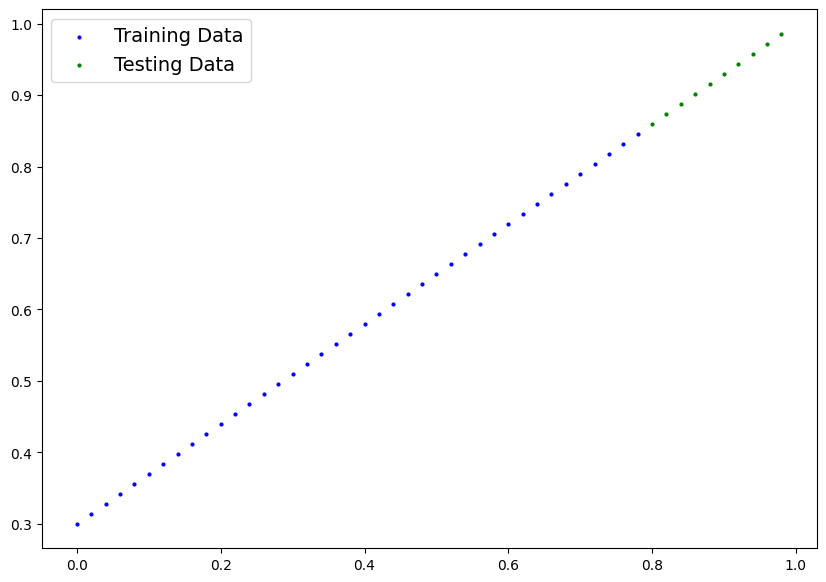

In [180]:
plot_prediction(Xtrain, Ytrain, Xtest, Ytest, torch.Tensor())

### Modelo de regresión lineal con PyTorch puro

In [8]:

class Lr(nn.Module):

    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float).unsqueeze(1))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    #Forward
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # return self.weights * x + self.bias
        return torch.matmul(x, self.weights) + self.bias


In [12]:
%%time
torch.manual_seed(42)
model = Lr()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01)
model.to('cuda')
next(model.parameters()).device
epochs = 1000
Xtrain = Xtrain.to('cuda')
Xtest = Xtest.to('cuda')
Ytrain = Ytrain.to('cuda')
Ytest = Ytest.to('cuda')
for epoch in range(epochs):
    model.train()
    y_pred = model(Xtrain)
    loss = loss_fn(y_pred, Ytrain)
    print(f"Loss: {loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
model.state_dict()

Loss: 0.31288135051727295
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183753490448
Loss: 0.26679736375808716
Loss: 0.25527632236480713
Loss: 0.24375534057617188
Loss: 0.23223434388637543
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713389158249
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310833394527435
Loss: 0.1515873521566391
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Loss: 0.08227582275867462
Loss: 0.07638873159885406
Loss: 0.07160007953643799
Loss: 0.06747635453939438
Loss: 0.06395437568426132
Loss: 0.06097004562616348
Loss: 0.058458197861909866
Loss: 0.05635259300470352
Loss: 0.0545857809484005
Loss: 0.0531485341489315
Loss: 0.05181945487856865
Loss: 0.05069301277399063
Loss: 0.0498228557407856
Loss: 0.04895269498229027
Loss: 0.048193514347076416
Loss: 0.047531820833683014
Loss: 0.04692792892456055
Loss: 0.04642331600

OrderedDict([('weights', tensor([[0.6990]], device='cuda:0')),
             ('bias', tensor([0.3093], device='cuda:0'))])

736 666

In [10]:
torch.manual_seed(42)

model = Lr()

list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [57]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Hacer predicciones

In [17]:
Xtest.T

tensor([[0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
         0.9800]])

In [9]:
with torch.inference_mode():
    y_pred = model(Xtest)
y_pred

tensor([[0.5694],
        [0.5761],
        [0.5828],
        [0.5896],
        [0.5963],
        [0.6030],
        [0.6098],
        [0.6165],
        [0.6232],
        [0.6300]])

In [10]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [97]:
Ytest

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

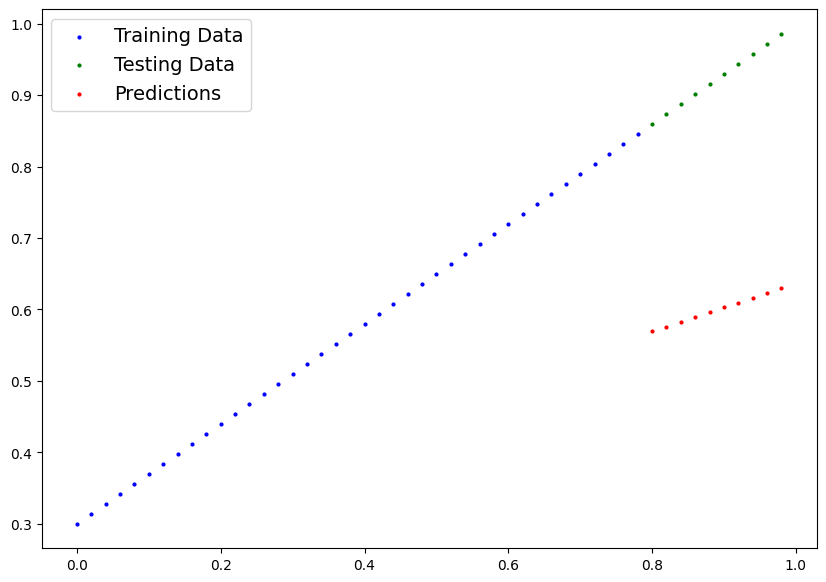

In [98]:
plot_prediction(Xtrain, Ytrain, Xtest, Ytest, y_pred)

In [43]:
y_pred = y_pred.reshape(-1, 1)
y_pred

tensor([[0.5694],
        [0.5761],
        [0.5828],
        [0.5896],
        [0.5963],
        [0.6030],
        [0.6098],
        [0.6165],
        [0.6232],
        [0.6300]])

### Entrenar un Modelo

Loss Function: Mide el error entre las predicciones y los valores reales de la variable target
Optimizador: Ayuda al modelo para el cambio de valor de parámetros internos para minimizar el error

In [71]:
## Función de Error
loss_fn = nn.L1Loss() ## MAE

# Optimizador
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01) #Optimizador estocástico para el descenso de gradiente. Params son los parámetros que queremos optimizar (peso y bias) y lf es el learning rate


### Training loop
1.- Forward
2.- Calcular Error
3.- Optimizador
4.- Backwards

In [47]:
epochs = 100

In [72]:
for epoch in range(epochs):
    model.train()
    y_pred = model(Xtrain)
    loss = loss_fn(y_pred, Ytrain)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

list(model.parameters())

[Parameter containing:
 tensor([0.4314], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

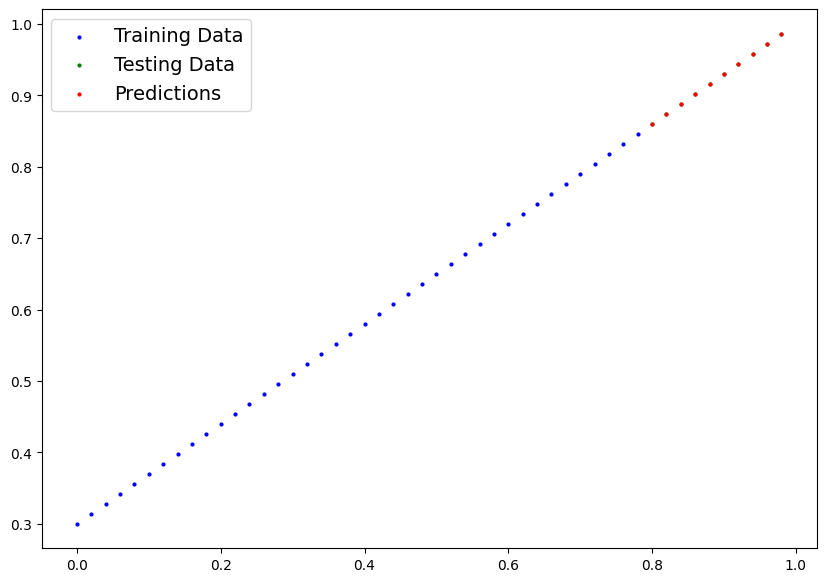

In [186]:
with torch.inference_mode():
    Xtrain = Xtrain.to('cpu')
    Ytrain = Ytrain.to('cpu')
    y_pred = model(Xtest)
    Xtest = Xtest.to('cpu')
    Ytest = Ytest.to('cpu')
    y_pred = y_pred.to('cpu')

plot_prediction(Xtrain, Ytrain, Xtest, Ytest, y_pred)

### Test Loop
1.- Con inference_mode
2.- Forward
3.- Calcular Error

In [55]:
epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epoch):

    model.eval()
    with torch.inference_mode():
        test_pred = model(Xtest.reshape(1, -1)).reshape(-1, 1)

        loss = loss_fn(test_pred, Ytest)

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss)
            test_loss_values.append(test_loss)
            print(f"Epoch: {epoch} | MAE Test: {test_loss} | MAE Train: {loss}")

Epoch: 0 | MAE: 0.002927726600319147
Epoch: 10 | MAE: 0.002927726600319147
Epoch: 20 | MAE: 0.002927726600319147
Epoch: 30 | MAE: 0.002927726600319147
Epoch: 40 | MAE: 0.002927726600319147
Epoch: 50 | MAE: 0.002927726600319147
Epoch: 60 | MAE: 0.002927726600319147
Epoch: 70 | MAE: 0.002927726600319147
Epoch: 80 | MAE: 0.002927726600319147
Epoch: 90 | MAE: 0.002927726600319147


In [123]:
torch.manual_seed(42)
model = Lr()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.005)
epochs = 1000
model.to('cuda')
next(model.parameters()).device

device(type='cuda', index=0)

In [124]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367], device='cuda:0')),
             ('bias', tensor([0.1288], device='cuda:0'))])

In [125]:
epochs = 1000
Xtrain = Xtrain.to('cuda')
Xtest = Xtest.to('cuda')
Ytrain = Ytrain.to('cuda')
Ytest = Ytest.to('cuda')
for epoch in range(epochs):
    model.train()
    y_pred = model(Xtrain)
    loss = loss_fn(y_pred, Ytrain)
    print(f"Loss: {loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
model.state_dict()

Loss: 0.31520015001296997
Loss: 0.31030312180519104
Loss: 0.3054969608783722
Loss: 0.30078208446502686
Loss: 0.2961461842060089
Loss: 0.29161888360977173
Loss: 0.2871967554092407
Loss: 0.28289473056793213
Loss: 0.2786511778831482
Loss: 0.274519145488739
Loss: 0.2705014944076538
Loss: 0.2666093707084656
Loss: 0.2627750337123871
Loss: 0.2590544521808624
Loss: 0.2554580867290497
Loss: 0.2519443929195404
Loss: 0.24852323532104492
Loss: 0.24521277844905853
Loss: 0.24199672043323517
Loss: 0.23887696862220764
Loss: 0.23584845662117004
Loss: 0.2329206019639969
Loss: 0.23007601499557495
Loss: 0.2273249328136444
Loss: 0.22466929256916046
Loss: 0.22209155559539795
Loss: 0.21960246562957764
Loss: 0.2171984761953354
Loss: 0.21487659215927124
Loss: 0.21263621747493744
Loss: 0.21046535670757294
Loss: 0.20837491750717163
Loss: 0.2063485085964203
Loss: 0.2044031023979187
Loss: 0.2025250643491745
Loss: 0.20071479678153992
Loss: 0.1989729404449463
Loss: 0.19729335606098175
Loss: 0.19567130506038666
Loss:

OrderedDict([('weights', tensor([0.1969], device='cuda:0')),
             ('bias', tensor([0.4927], device='cuda:0'))])

In [31]:
# Todo junto
torch.manual_seed(42)
model = Lr()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.002)
epochs = 900
model.to('cuda')

epoch_count = []
train_loss_values = []
test_loss_values = []

Xtrain = Xtrain.to('cuda')
Xtest = Xtest.to('cuda')
Ytrain = Ytrain.to('cuda')
Ytest = Ytest.to('cuda')
for epoch in range(epochs):
    model.train()
    y_pred = model(Xtrain)
    loss = loss_fn(y_pred, Ytrain)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model(Xtest)

        test_loss = loss_fn(test_pred, Ytest.type(torch.float))

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            loss = loss.to('cpu')
            train_loss_values.append(loss.detach().numpy())
            test_loss = test_loss.to('cpu')
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Test: {test_loss} | MAE Train: {loss}")


Epoch: 0 | MAE Test: 0.49184200167655945 | MAE Train: 0.31288135051727295
Epoch: 10 | MAE Test: 0.46490007638931274 | MAE Train: 0.28983935713768005
Epoch: 20 | MAE Test: 0.43795815110206604 | MAE Train: 0.26679736375808716
Epoch: 30 | MAE Test: 0.41101622581481934 | MAE Train: 0.24375538527965546
Epoch: 40 | MAE Test: 0.38407430052757263 | MAE Train: 0.22071340680122375
Epoch: 50 | MAE Test: 0.3571324050426483 | MAE Train: 0.19767141342163086
Epoch: 60 | MAE Test: 0.3301904797554016 | MAE Train: 0.17462943494319916
Epoch: 70 | MAE Test: 0.3032485544681549 | MAE Train: 0.15158747136592865
Epoch: 80 | MAE Test: 0.2763066291809082 | MAE Train: 0.12854546308517456
Epoch: 90 | MAE Test: 0.250068336725235 | MAE Train: 0.10654216259717941
Epoch: 100 | MAE Test: 0.2268170565366745 | MAE Train: 0.08969350159168243
Epoch: 110 | MAE Test: 0.20659013092517853 | MAE Train: 0.07725932449102402
Epoch: 120 | MAE Test: 0.18906402587890625 | MAE Train: 0.0682617723941803
Epoch: 130 | MAE Test: 0.173986

001976698637008667
005649476777762175



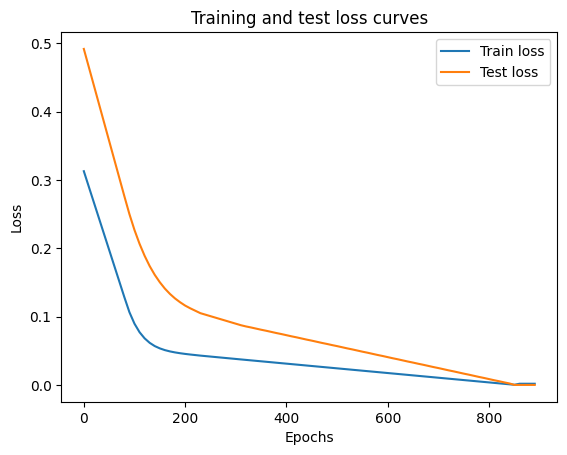

In [32]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

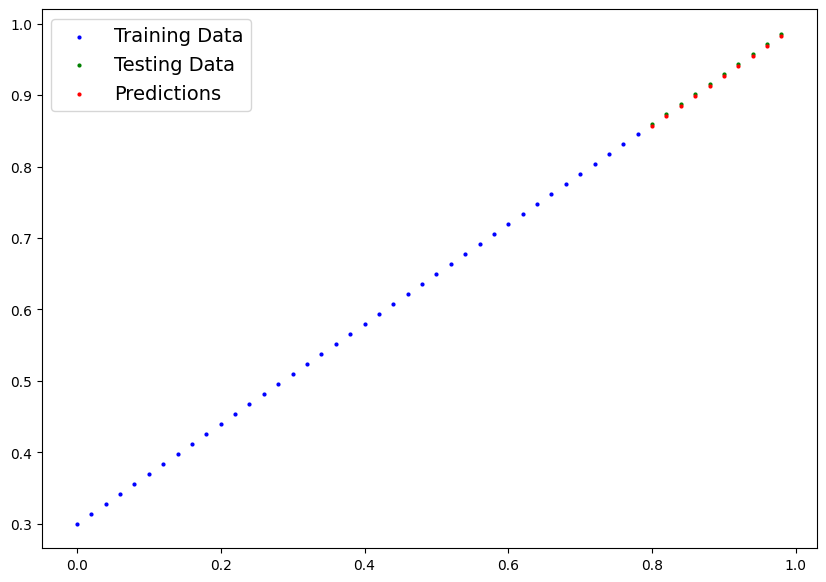

In [43]:
model.eval()
y_pred = model(Xtest)
plot_prediction(Xtrain, Ytrain, Xtest, Ytest, y_pred.detach())

In [111]:
X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [112]:
Xtrain

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]])

In [114]:
Xtest

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [116]:
Ytrain

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460]])

In [117]:
Ytest

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

### Guardar un modelo de PyTorch

In [187]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_0.pth


### Cargar un modelo de PyTorch

In [188]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = Lr()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [189]:
loaded_model_0.eval()
Xtest = Xtest.to('cpu')
# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(Xtest) # perform a forward pass on the test data with the loaded model

# Compare previous model predictions with loaded model predictions (these should be the same)
y_pred == loaded_model_preds



tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])